## Notebook Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from util import util
import numpy as np

2023-07-06 18:43:52.047822: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 18:43:52.086870: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 18:43:52.087583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 18:43:53.045066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Model Choice

Optimization problem:

$$\text{argmin}_{y} \{c_0 y_0 + c_1 y_1 \mid y_0 + y_1 = 1\}$$

Ground truth relation:

$$\begin{align}
c_0 &= 2.5 x^2 \\
c_1 &= 0.3 + 0.8 x
\end{align}$$

Predictive model 1:

$$\begin{align}
\hat{c}_0 &= w^2 x \\
\hat{c}_1 &= 0.5 w
\end{align}$$

Predictive model 2:

$$\begin{align}
\hat{c}_0 &= |w| x \\
\hat{c}_1 &= 1 - |w| x
\end{align}$$

Predictive model 3:

$$\begin{align}
\hat{c}_0 &= w x \\
\hat{c}_1 &= 0.1 - w x
\end{align}$$

In [10]:
# Model choice
model = 1

Optimized w: 1.3753753753753755


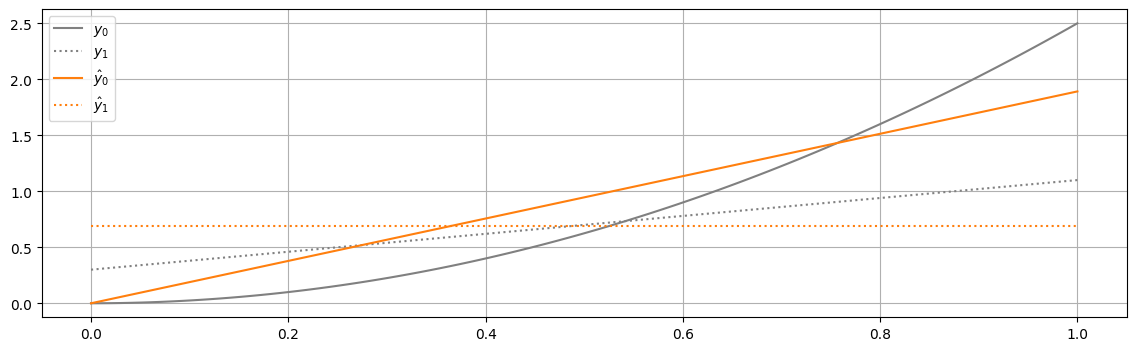

In [11]:
x = np.linspace(0, 1, 100)
util.draw(w=None, figsize=(14, 4), model=model)

## Instances

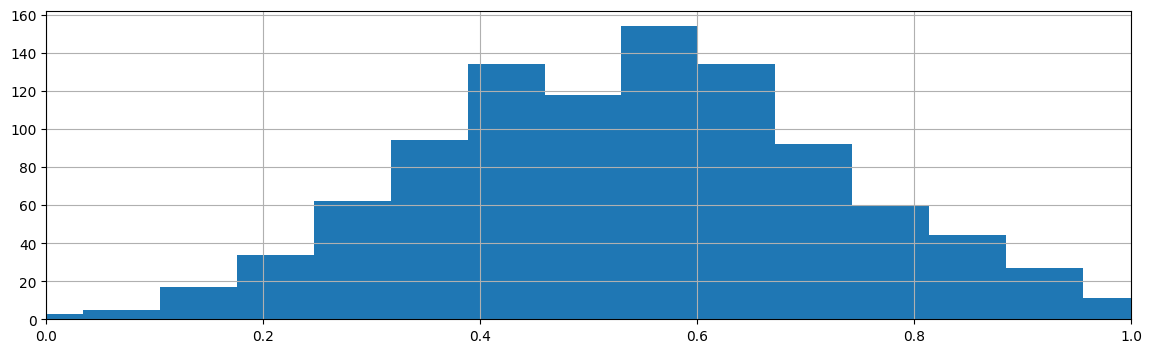

In [156]:
from matplotlib import pyplot as plt
x = util.normal_sample_(mean=0.54, std=0.2, size=1000)
plt.figure(figsize=(14, 4))
plt.xlim(0, 1)
plt.hist(x, bins=20)
plt.grid(':')

# Reference Solution

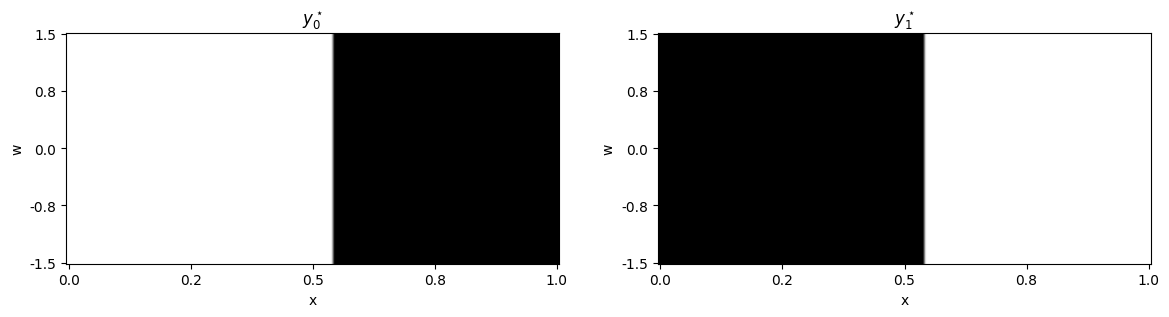

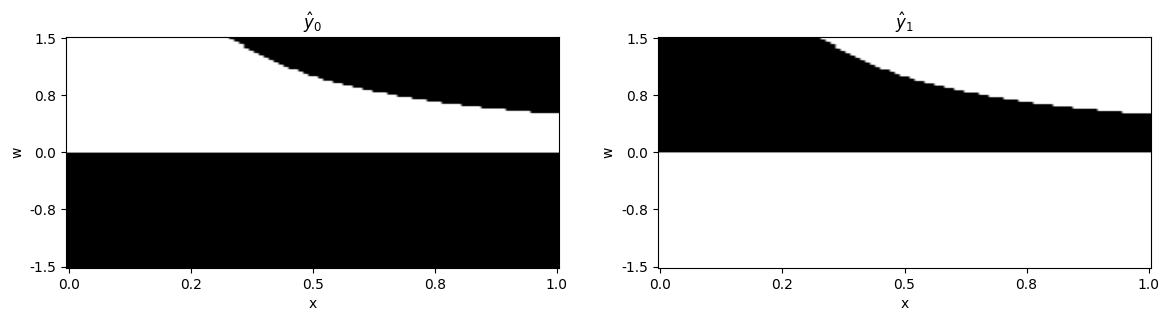

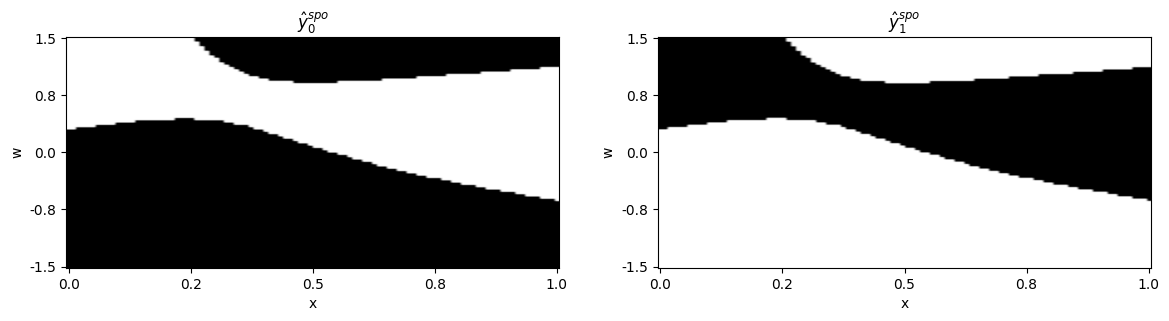

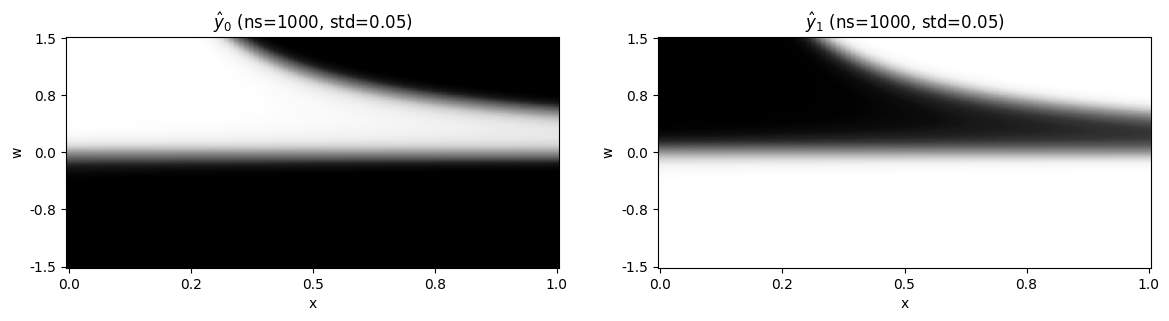

In [12]:
util.draw_solution_landscape(ytype='y_star', model=model, figsize=(14, 3))
util.draw_solution_landscape(ytype='y_hat', model=model, figsize=(14, 3))
util.draw_solution_landscape(ytype='y_spo', model=model, figsize=(14, 3))
util.draw_solution_landscape(ytype='y_hat', model=model, figsize=(14, 3), smoothing_samples=1000, smoothing_std=0.05)

# Actual Cost

Actual cost vs regret:

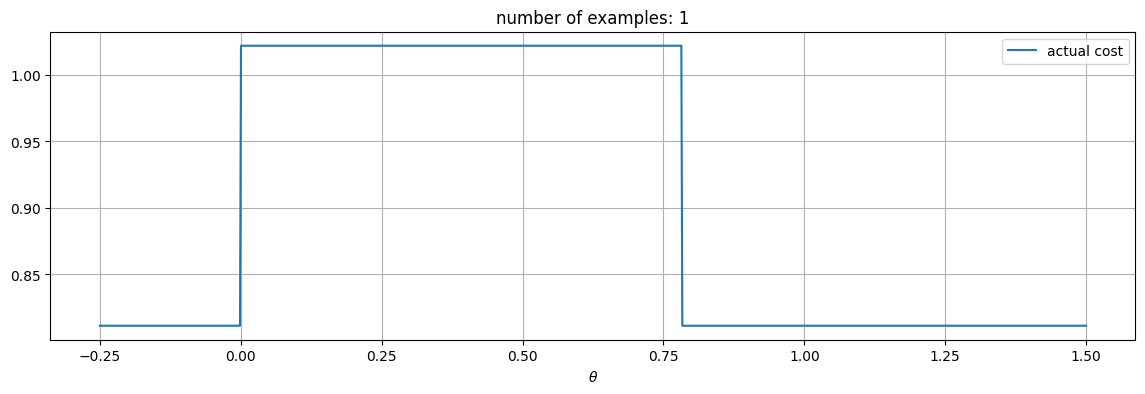

In [16]:
util.draw_loss_landscape(losses = [
                            util.ActualCostLoss(),
                         ], model=model, seed=42, batch_size=1)

Effect of batch size

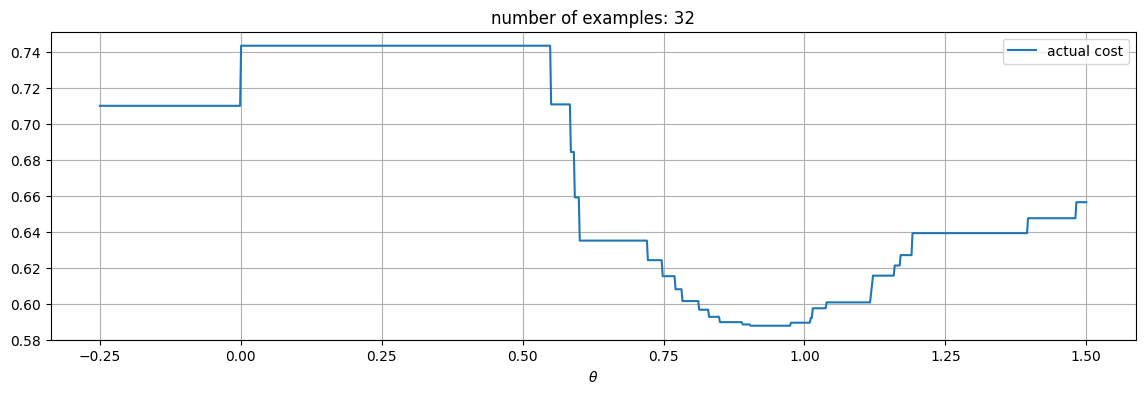

In [17]:
util.draw_loss_landscape(losses = [
                            util.ActualCostLoss(),
                         ], model=model, seed=42, batch_size=32)

Effect of full distribution

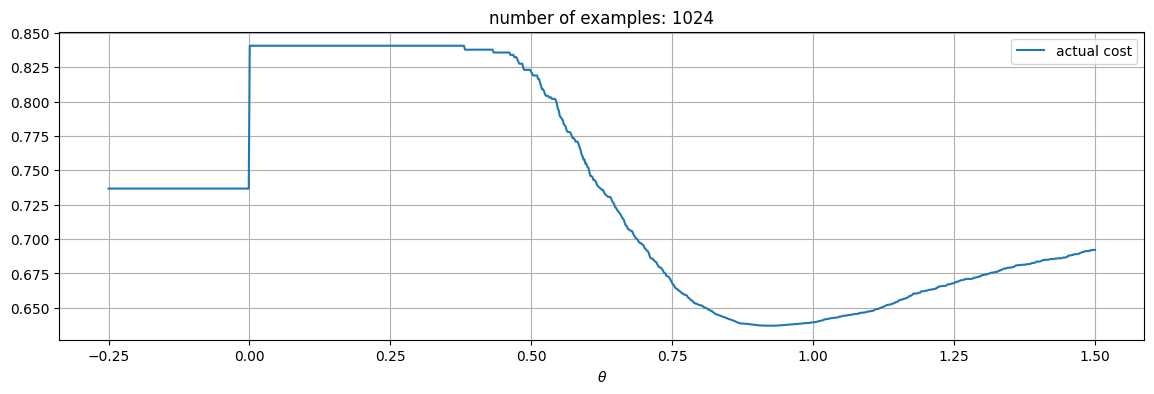

In [18]:
util.draw_loss_landscape(losses = [
                            util.ActualCostLoss(),
                         ], model=model, seed=42, batch_size=1024)

## Comparing DFL Losses

For a single sample

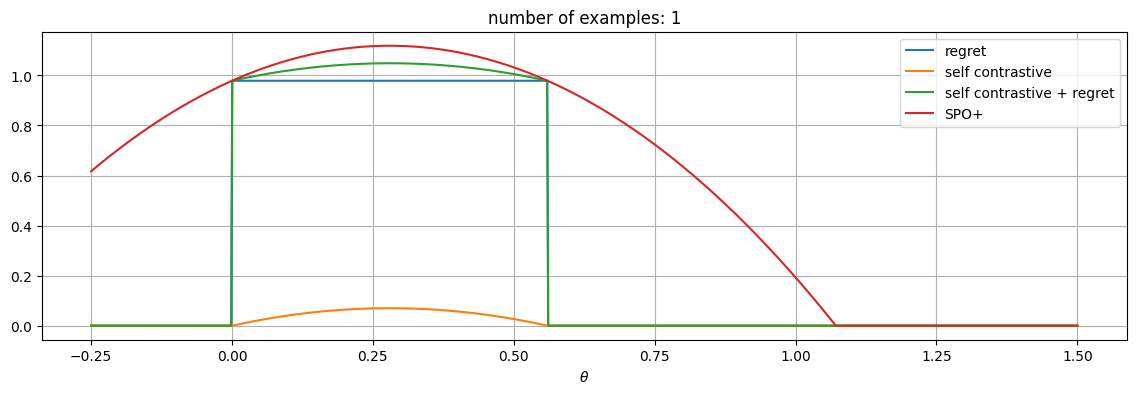

In [19]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.SelfContrastiveLoss(),
                            util.SelfContrastiveRegretLoss(),
                            util.SPOPlusLoss(),
                         ], model=model, seed=0, batch_size=1)

For a small batch

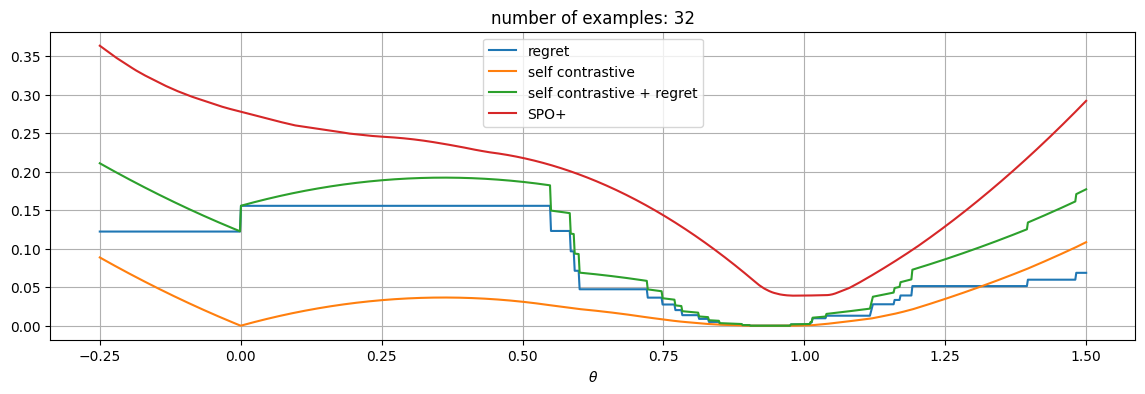

In [20]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.SelfContrastiveLoss(),
                            util.SelfContrastiveRegretLoss(),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=32)

For a the full distribution

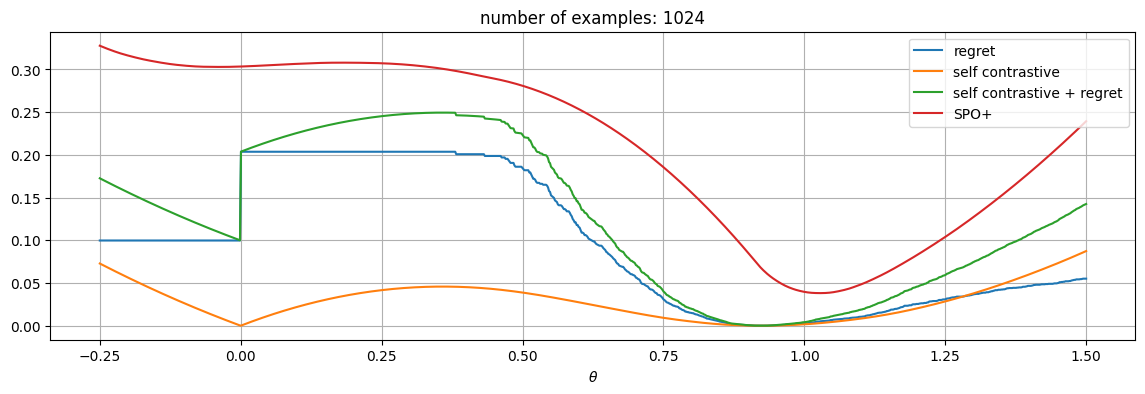

In [21]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.SelfContrastiveLoss(),
                            util.SelfContrastiveRegretLoss(),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=1024)

## Analysis of the SPO Plus Loss

Effect of $\alpha$ (for a single example)

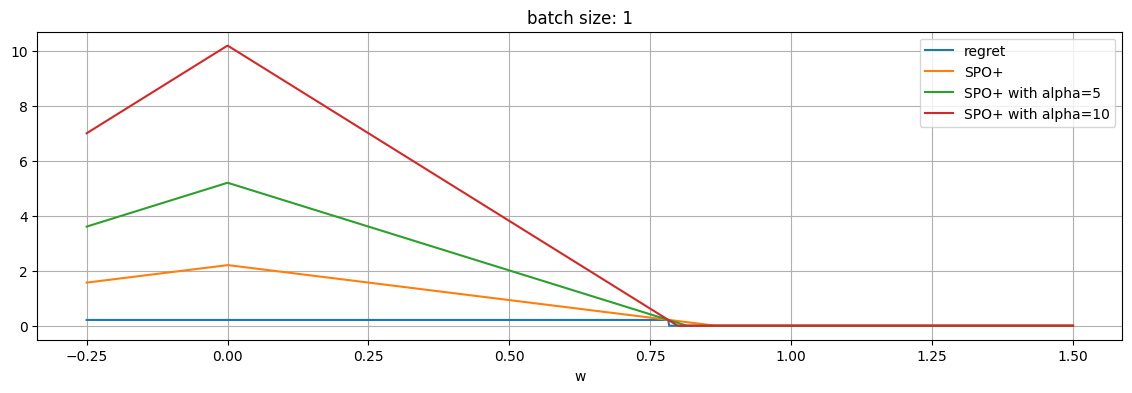

In [152]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.SPOPlusLoss(),
                            util.SPOPlusLoss(alpha=5), 
                            util.SPOPlusLoss(alpha=10)
                         ], model=model, seed=42, batch_size=1)

Effect of $\alpha$ (full distribution)

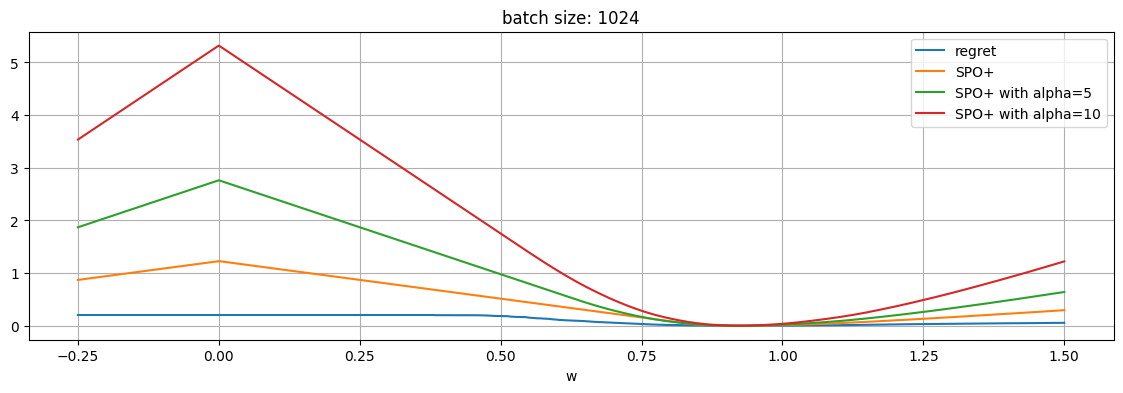

In [153]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.SPOPlusLoss(),
                            util.SPOPlusLoss(alpha=5), 
                            util.SPOPlusLoss(alpha=10)
                         ], model=model, seed=42, batch_size=1024)

## Analysis of Stochastic Smoothing

Stochastic smoothing (a large number of samples is needed, since in practice we estimate the gradient and not the loss)

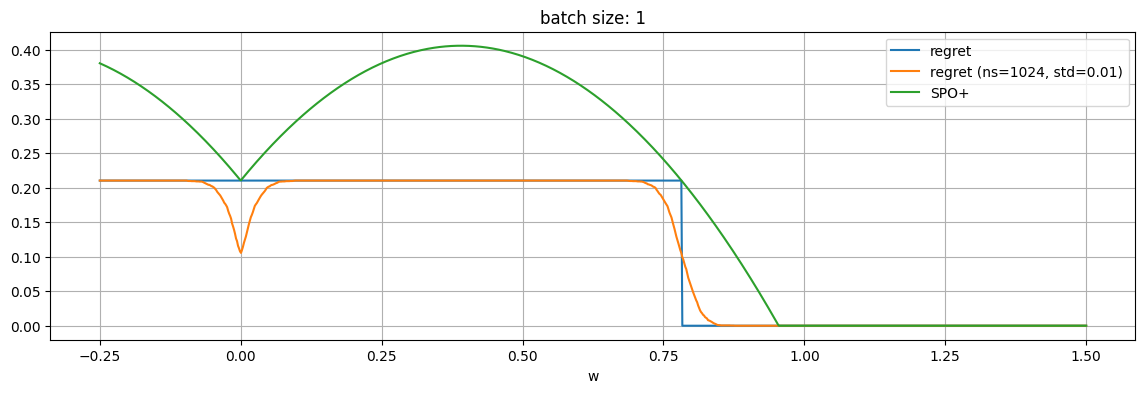

In [128]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.01),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=1)

On a larger batch:

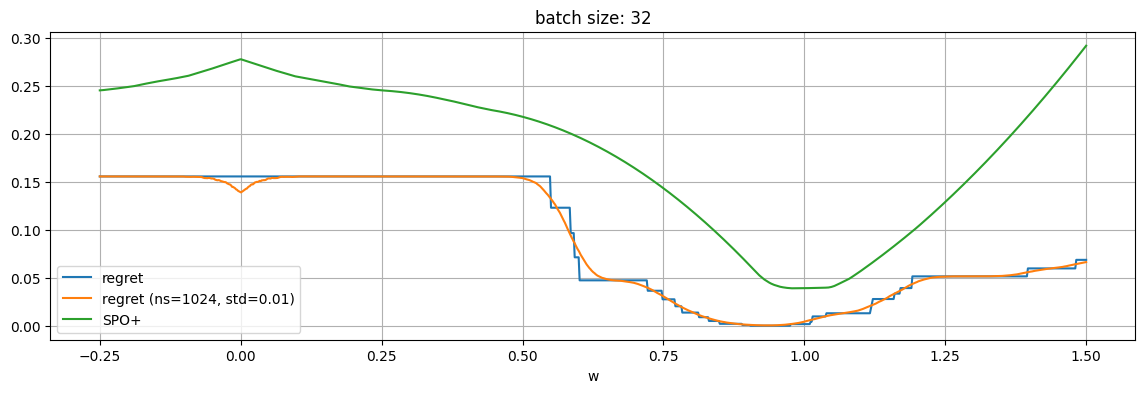

In [129]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.01),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=32)

On the full distribution

In [130]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.01),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=1024)

KeyboardInterrupt: 

## Stochastic smoothing, chaning the standard deviation

Changing the standard deviation for a single example:

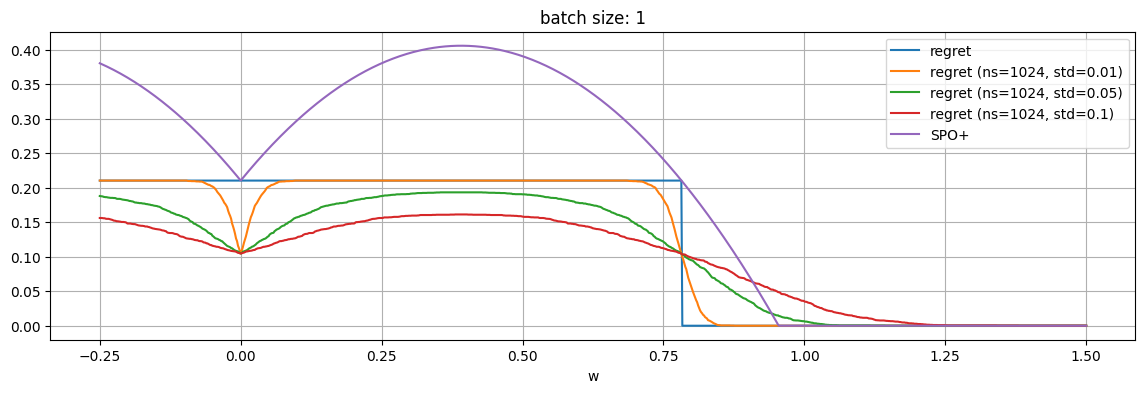

In [131]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.01),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.05),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.1),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=1)

Changing the standard deviation for a small batch:

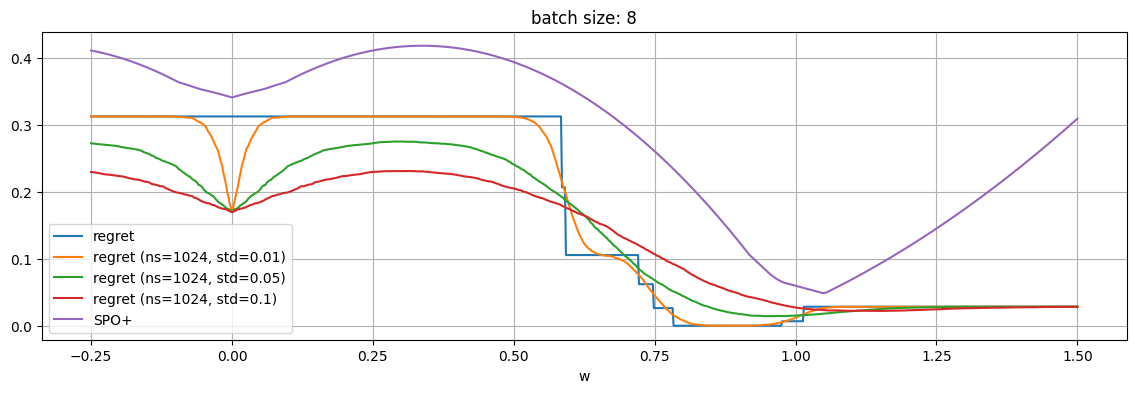

In [132]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.01),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.05),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.1),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=8)

Changing the standard deviation for a larger batch:

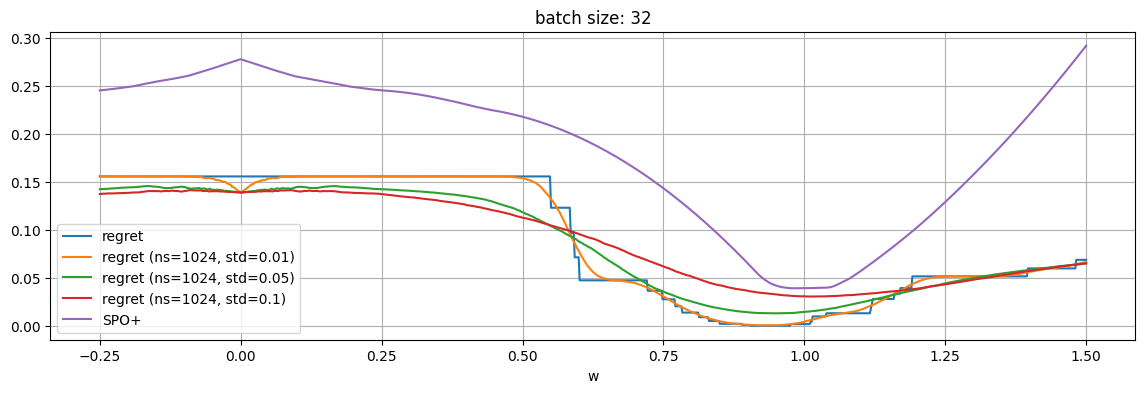

In [98]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.01),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.05),
                            util.RegretLoss(smoothing_samples=1024, smoothing_std=0.1),
                            util.SPOPlusLoss(),
                         ], model=model, seed=42, batch_size=32)

## Stochastic Smoothing (self-contrastive + regret)

Stochastic smoothing, self contrastive + regret

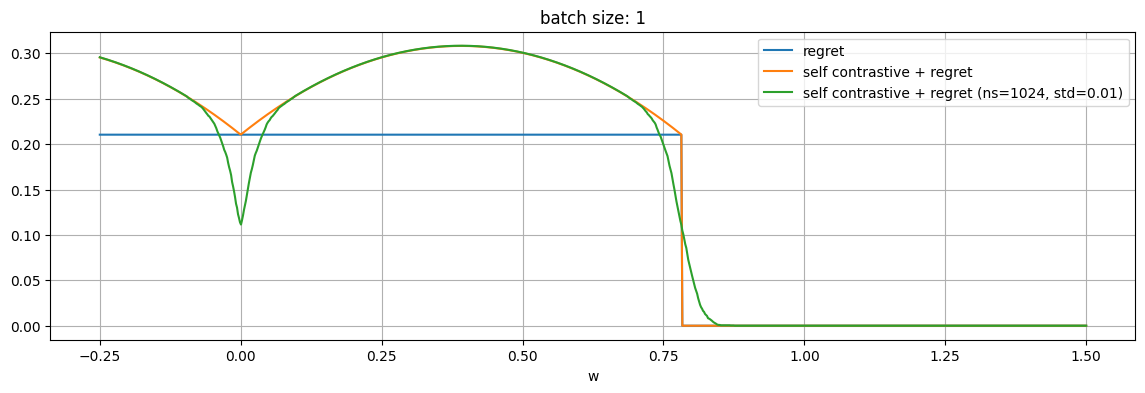

In [99]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.SelfContrastiveRegretLoss(),
                            util.SelfContrastiveRegretLoss(smoothing_samples=1024, smoothing_std=0.01)
                         ], model=model, seed=42, batch_size=1)

Same as above, on a larger batch

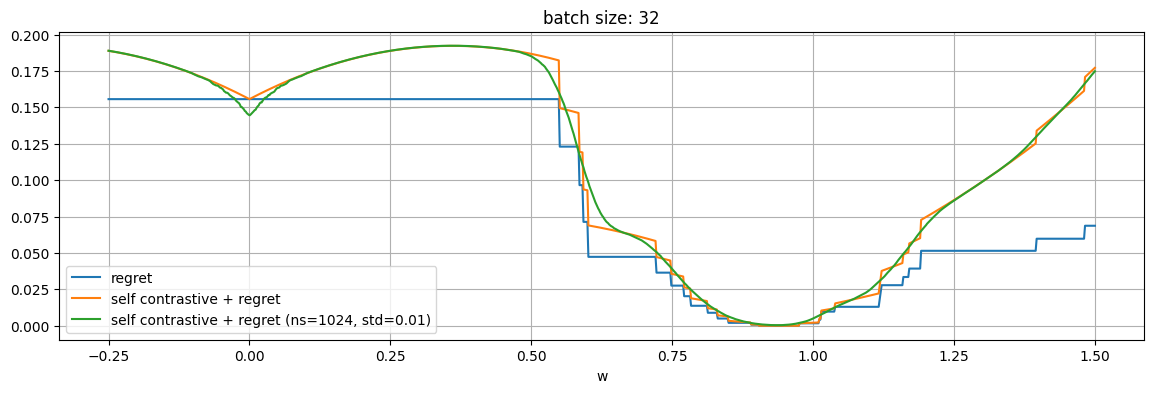

In [100]:
util.draw_loss_landscape(losses = [
                            util.RegretLoss(),
                            util.SelfContrastiveRegretLoss(),
                            util.SelfContrastiveRegretLoss(smoothing_samples=1024, smoothing_std=0.01)
                         ], model=model, seed=42, batch_size=32)